In [1]:
# Cell 1: Setup and Imports
import sys
sys.path.append('../../pythonside')

import extract_data as ed
import numpy as np
import matplotlib.pyplot as plt
from functions import (
    skewness, kurtosis,
    pearson_skewness, bowley_skewness
)
import graph as gh

# Load dataset
file = '../../data/breast-country.csv'
column_name, asr_data = ed.extractinfo(file, [7, 'ASR (World) per 100 000'])

In [2]:
# Cell 2: Skewness Calculations
print("=== SKEWNESS ANALYSIS ===")
print(f"1. Moment Coefficient: {skewness(asr_data):.3f}")
print(f"2. Pearson's Skewness: {pearson_skewness(asr_data):.3f}")
print(f"3. Bowley's Skewness: {bowley_skewness(asr_data):.3f}\n")

# Interpretation
print("Interpretation:")
if abs(skewness(asr_data)) > 0.5:
    print("- Significant skewness detected")
else:
    print("- Moderate skewness")
    
if pearson_skewness(asr_data) > 0:
    print("- Right/positive skew (mean > median)")
else:
    print("- Left/negative skew")

=== SKEWNESS ANALYSIS ===
1. Moment Coefficient: 0.395
2. Pearson's Skewness: 1.976
3. Bowley's Skewness: -1.876

Interpretation:
- Moderate skewness
- Right/positive skew (mean > median)


In [3]:
# Cell 3: Kurtosis Analysis
excess_kurtosis = kurtosis(asr_data)
print("\n=== KURTOSIS ANALYSIS ===")
print(f"Excess Kurtosis: {excess_kurtosis:.3f}")

print("\nInterpretation:")
if excess_kurtosis > 0:
    print("- Leptokurtic distribution (sharper peak, heavier tails)")
elif excess_kurtosis < 0:
    print("- Platykurtic distribution (flatter peak, lighter tails)")
else:
    print("- Mesokurtic (normal-like kurtosis)")


=== KURTOSIS ANALYSIS ===
Excess Kurtosis: -0.380

Interpretation:
- Platykurtic distribution (flatter peak, lighter tails)


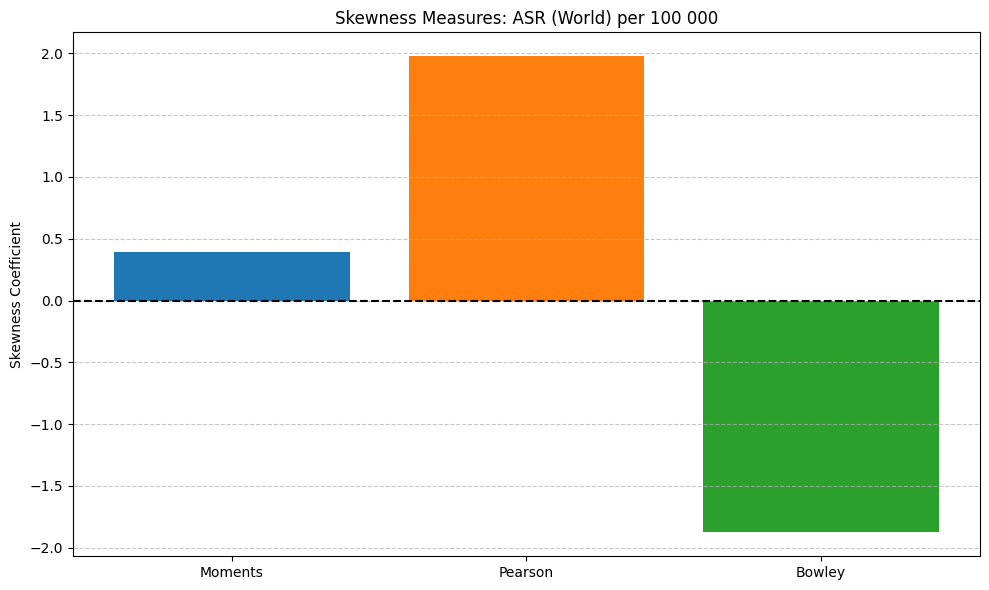

In [6]:
# Cell 4: Visualization (Updated)
import os

# Create directory if it doesn't exist
os.makedirs('../../images/graph', exist_ok=True)

gh.plot_skew_comparison(
    data=asr_data,
    title=f'Skewness Measures: {column_name}',
    figsize=(10, 6)
)
plt.savefig('../images/graph/skewness_comparison.png', dpi=300, bbox_inches='tight')
plt.show()